In [21]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib

In [3]:
# simplified network
Gs = ox.io.load_graphml(filepath='Hungray_freeways_2.graphml')
# large network without simplification (contains road segment maxspeeds)
Gl = ox.io.load_graphml(filepath='Hungray_freeways_3.graphml')

In [4]:
# dataframes
nodes_s, edges_s = ox.graph_to_gdfs(Gs)
nodes_l, edges_l = ox.graph_to_gdfs(Gl)

In [5]:
# edges of the smaller graph
edges_s.head()

osmid  \
u        v          key                                                      
15477253 2144826932 0                                            220025554   
         1798431893 0    [229894467, 747778275, 81147236, 41764169, 417...   
15488759 516010292  0                                            220025534   
         516011826  0                                            220025546   
         516011080  0                                              4059603   

                         oneway lanes  ref  highway    length  \
u        v          key                                         
15477253 2144826932 0      True     1  578  primary    43.487   
         1798431893 0     False   NaN  578  primary  3056.257   
15488759 516010292  0     False     3   57  primary    40.630   
         516011826  0     False     5   58  primary    36.185   
         516011080  0     False     3   57  primary    35.499   

                                                                  geometry  \
u        v          key                                                      
15477253 2144826932 0    LINESTRING (18.27579 46.06411, 18.27567 46.064...   
         1798431893 0    LINESTRING (18.27579 46.06411, 18.27623 46.064...   
15488759 516010292  0    LINESTRING (18.23190 46.04513, 18.23147 46.04493)   
         516011826  0    LINESTRING (18.23190 46.04513, 18.23188 46.04546)   
         516011080  0    LINESTRING (18.23190 46.04513, 18.23209 46.045...   

                                         name  maxspeed bridge junction  \
u        v          key                                                   
15477253 2144826932 0                     NaN       NaN    NaN      NaN   
         1798431893 0               Üszögi út  [90, 50]    NaN      NaN   
15488759 516010292  0          Maléter Pál út        50    NaN      NaN   
         516011826  0              Siklósi út        50    NaN      NaN   
         516011080  0    Kanizsai Dorottya út        50    NaN      NaN   

                        access tunnel width service  
u        v          key                              
15477253 2144826932 0      NaN    NaN   NaN     NaN  
         1798431893 0      NaN    NaN   NaN     NaN  
15488759 516010292  0      NaN    NaN   NaN     NaN  
         516011826  0      NaN    NaN   NaN     NaN  
         516011080  0      NaN    NaN   NaN     NaN

In [6]:
# the problem is, that due to aggregation, there is not a single speed limit on the edges!
# moreover, they correspond to quite large distances, so it's not straightforward to take an average
edges_s["maxspeed"].map(type).value_counts()

<class 'str'>      7410
<class 'float'>    5381
<class 'list'>     1201
Name: maxspeed, dtype: int64

In [7]:
# edges of the larger graph
edges_l.head()

osmid lanes ref             name  highway  \
u        v          key                                                  
15370050 15370066   0    666515321     4   6  Makay István út  primary   
         359453626  0    690945792     5   6  Makay István út  primary   
15370066 15370050   0    666515321     4   6  Makay István út  primary   
         6240291298 0    690945789     5   6  Makay István út  primary   
15370069 3400078422 0     41712547     5   6  Makay István út  primary   

                        maxspeed  oneway  length junction bridge access  \
u        v          key                                                   
15370050 15370066   0         70   False  45.488      NaN    NaN    NaN   
         359453626  0         60   False  10.786      NaN    NaN    NaN   
15370066 15370050   0         70   False  45.488      NaN    NaN    NaN   
         6240291298 0         70   False  96.057      NaN    NaN    NaN   
15370069 3400078422 0         70   False  25.414      NaN    NaN    NaN   

                        tunnel width service  \
u        v          key                        
15370050 15370066   0      NaN   NaN     NaN   
         359453626  0      NaN   NaN     NaN   
15370066 15370050   0      NaN   NaN     NaN   
         6240291298 0      NaN   NaN     NaN   
15370069 3400078422 0      NaN   NaN     NaN   

                                                                  geometry  
u        v          key                                                     
15370050 15370066   0    LINESTRING (18.18311 46.06483, 18.18252 46.06481)  
         359453626  0    LINESTRING (18.18311 46.06483, 18.18325 46.06484)  
15370066 15370050   0    LINESTRING (18.18252 46.06481, 18.18311 46.06483)  
         6240291298 0    LINESTRING (18.18252 46.06481, 18.18127 46.06477)  
15370069 3400078422 0    LINESTRING (18.16440 46.06517, 18.16407 46.06519)

In [8]:
# the large dataframe has OK maxspeeds...
edges_l["maxspeed"].map(float).value_counts()

50.0     76843
90.0     59506
130.0    18645
60.0     11475
110.0    11289
40.0      7376
70.0      7003
80.0      1939
100.0     1565
30.0      1159
20.0       367
120.0      140
5.0         26
Name: maxspeed, dtype: int64

In [9]:
# this is a composite edge for example
print(edges_s.iloc[1,:])
print(edges_s.iloc[1,:]["osmid"])
osmids_s = edges_s.iloc[1,:]["osmid"]

osmid       [229894467, 747778275, 81147236, 41764169, 417...
oneway                                                  False
lanes                                                     NaN
ref                                                       578
highway                                               primary
length                                               3056.257
geometry    LINESTRING (18.2757879 46.0641143, 18.2762275 ...
name                                                Üszögi út
maxspeed                                             [90, 50]
bridge                                                    NaN
junction                                                  NaN
access                                                    NaN
tunnel                                                    NaN
width                                                     NaN
service                                                   NaN
Name: (15477253, 1798431893, 0), dtype: object
[229894467, 747778275, 

In [10]:
# this is how it looks like on the map
ox.plot_route_folium(Gs,(15477253, 1798431893))

<AxesSubplot:>

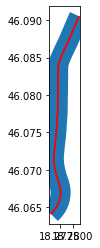

In [11]:
# this is how it looks like on the map
# so the simplified osm_id list corresponds to the segments exactly from the nonsimplified list
fig,ax = plt.subplots()
edges_s[edges_s["osmid"].map(lambda x: tuple(x) if type(x)==list else x)==tuple(osmids_s)].plot(ax=ax,lw=20)
edges_l[edges_l["osmid"].map(lambda oi: oi in set(osmids_s))].plot(color="red",ax=ax)

In [12]:
# getting average velocity by osm_id in the large dataset
# renaming columns to match unitary motion
edges_l["s"] = edges_l["length"]
edges_l["v"] = edges_l["maxspeed"].map(float)/3.6 # conversion to m/s
edges_l["t"] = edges_l["s"]/edges_l["v"]
# average velocity is total distance / total time
# there are some segments for which velocity is unknown
# we should infer it
velocities = edges_l.dropna(subset=["v"]).groupby(["osmid"])[["s","t"]].sum()
# avoid division by zero
velocities["v_avg"] = velocities["s"]/velocities["t"] * 3.6 # conversion to km/h
velocities

,s,t,v_avg
osmid,,,
3390680,577.750,34.665000,60.0
3427783,288.592,17.315520,60.0
3430149,62.756,4.518432,50.0
3551814,84.522,6.085584,50.0
3987485,148.547,10.695384,50.0
...,...,...,...
1034663338,87.452,6.296544,50.0
1034845804,55.264,1.808640,110.0
1034845805,9.245,0.302564,110.0


Text(0, 0.5, 'Count')

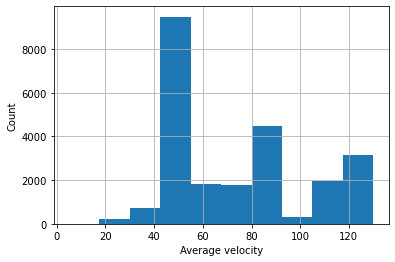

In [13]:
velocities["v_avg"].hist()
plt.xlabel("Average velocity")
plt.ylabel("Count")

In [14]:
avg_velocities_s = pd.merge(edges_s.explode(column="osmid")[["osmid","highway","length"]],velocities,left_on="osmid",right_index=True)\
    .reset_index()\
    .groupby(["u","v","key"])\
    .sum()[["s","t"]]
avg_velocities_s["v"] = avg_velocities_s["s"]/avg_velocities_s["t"] * 3.6
avg_velocities_s

s           t          v
u          v          key                                 
15241698   15241865   0      59.683    2.387320  90.000000
           5491272720 0     119.316    4.772640  90.000000
15241865   1282549054 0    7807.266  398.703656  70.493855
           5491272720 0      57.288    2.291520  90.000000
15347150   1810157586 0      77.032    5.546304  50.000000
...                             ...         ...        ...
9502739765 26754803   0      76.024    4.561440  60.000000
           1510346310 0    9679.780  571.820616  60.940804
           9502739762 0      54.598    3.275880  60.000000
9502941398 1779593548 0    1656.130  119.241360  50.000000
           1866388228 1      47.855    1.914200  90.000000

[8611 rows x 3 columns]

Text(0, 0.5, 'Count')

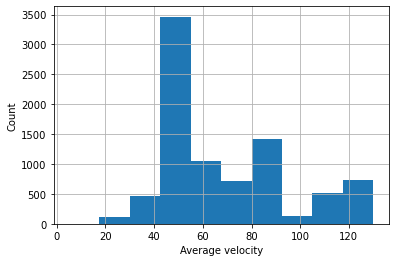

In [15]:
avg_velocities_s["v"].hist()
plt.xlabel("Average velocity")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

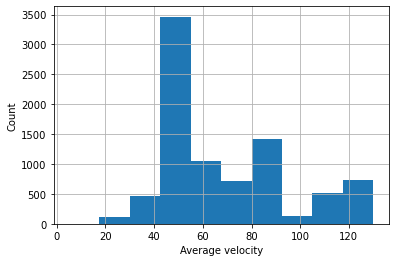

In [16]:
edges_s["maxspeed"] = edges_s.index.map(avg_velocities_s["v"])
edges_s["maxspeed"].hist()
plt.xlabel("Average velocity")
plt.ylabel("Count")

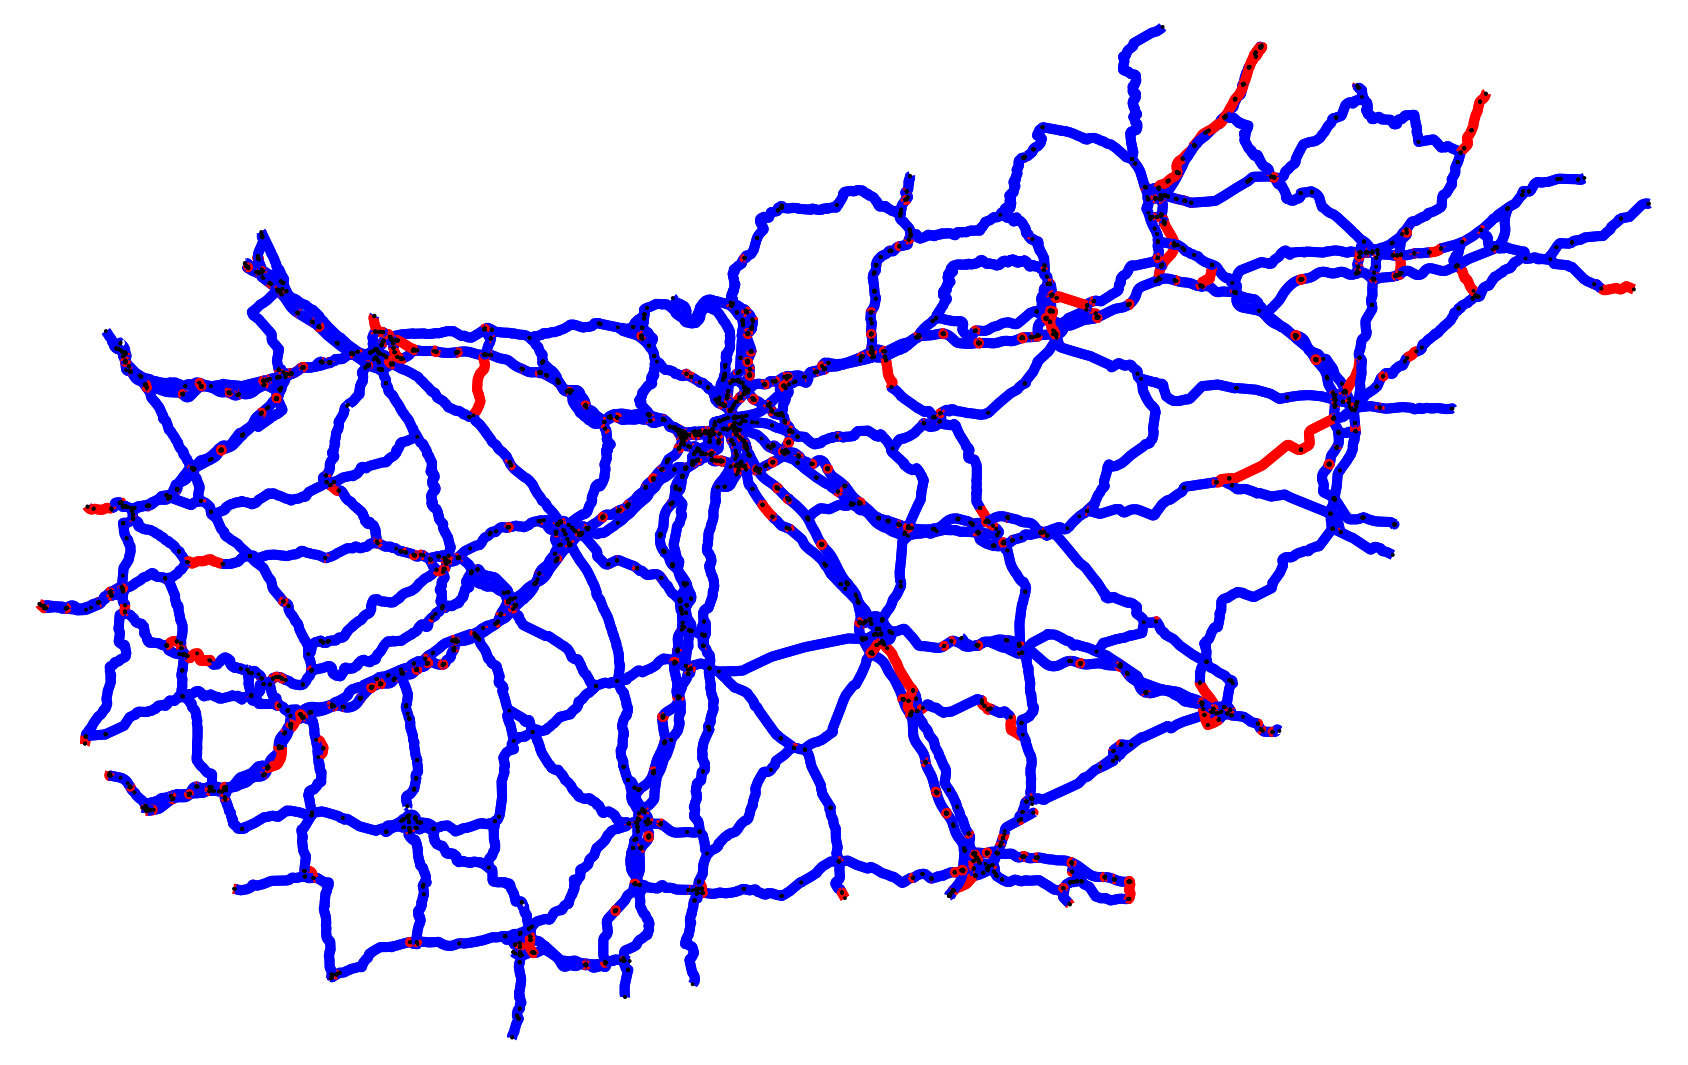

(<Figure size 2160x1440 with 1 Axes>, <AxesSubplot:>)

In [17]:
# where is the speed data missing?
na_velocity = [(t[0],t[1]) for t in edges_s.index[pd.isnull(edges_s["maxspeed"])].tolist()]
fig,ax = plt.subplots(1,1,figsize=(30,20))
ox.plot_graph(Gs,node_color='k',edge_color=['b' if e not in na_velocity else 'r' for e in Gs.edges()],ax=ax,edge_linewidth=10)

In [18]:
# for what road types are these speed limits missing?
edges_s["highway"] = edges_s["highway"].map(lambda x: tuple(x) if type(x)==list else x)
edges_s[pd.isnull(edges_s["maxspeed"])]["highway"].value_counts()

primary                        2866
motorway_link                  1224
primary_link                    657
trunk_link                      523
motorway                         69
trunk                            31
(motorway_link, trunk_link)       7
(primary_link, primary)           2
(primary, primary_link)           1
(motorway_link, motorway)         1
Name: highway, dtype: int64

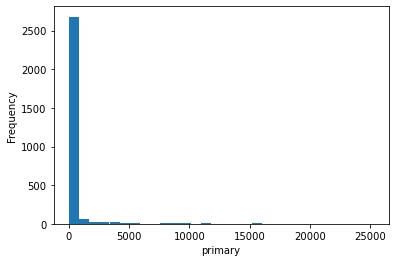

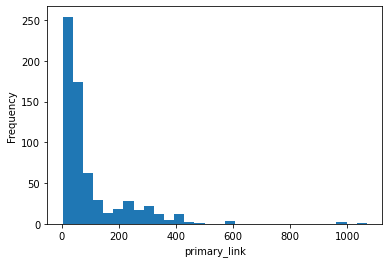

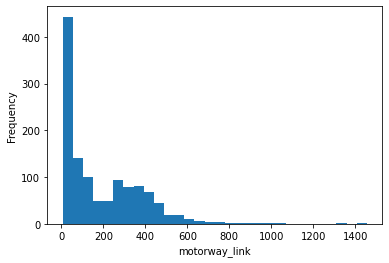

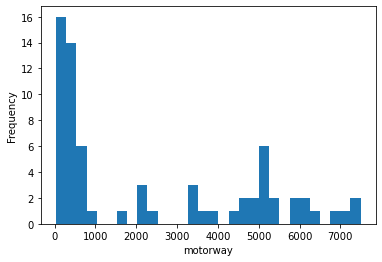

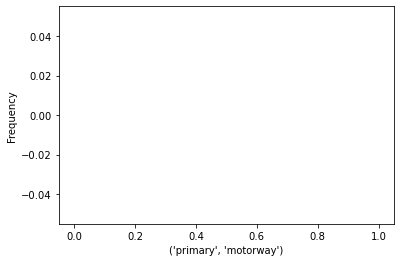

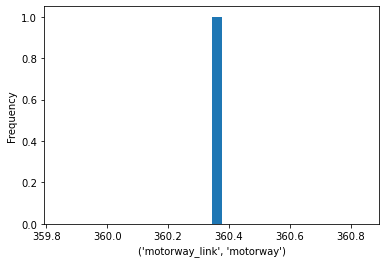

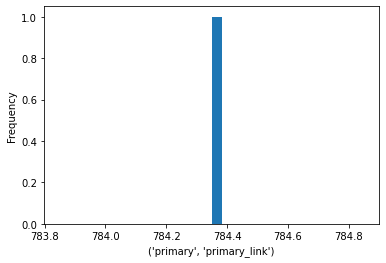

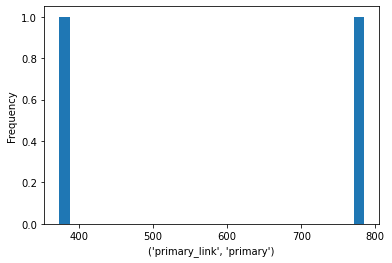

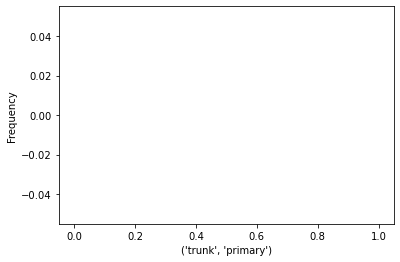

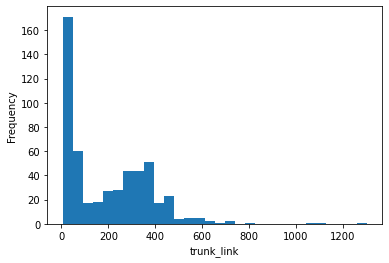

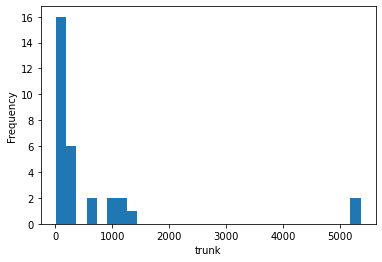

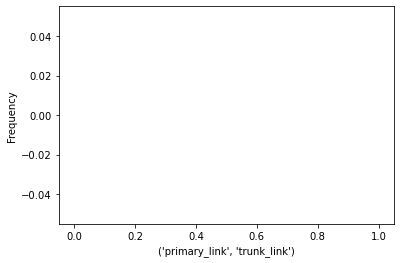

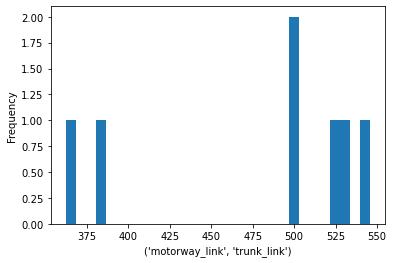

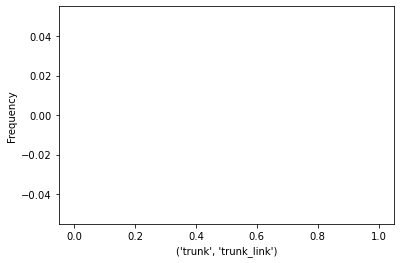

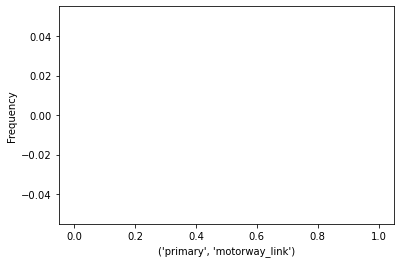

In [19]:
# distribution of segment lengths with missing maxspeed value 
# "links" are short, we can assume they are connecting segments
for h in edges_s["highway"].unique():
    plt.figure()
    edges_s[(pd.isnull(edges_s["maxspeed"]))&(edges_s["highway"]==h)]["length"].plot(kind="hist",bins=30)
    plt.xlabel(h)

Text(0, 0.5, 'Count')

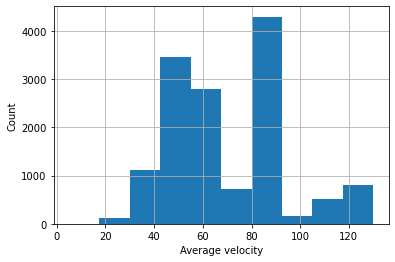

In [20]:
speeddict = {
    "primary":90,
    "motorway_link":60,
    "primary_link":40,
    "motorway":130,
    "trunk":100,
    "trunk_link":60
}

# mapping speed values for road types for which it is easy
def get_maxspeed(roadtype,maxspeed):
    if type(roadtype)!=tuple:
        return speeddict.get(roadtype)
    else:
        # we return 90 for the very strange 6 records that are very small in length
        return 90
    
edges_s["maxspeed_new"] = edges_s["maxspeed"].fillna(edges_s.apply(lambda r: get_maxspeed(r["highway"],r["maxspeed"]),axis=1))
edges_s["maxspeed_new"].hist()
plt.xlabel("Average velocity")
plt.ylabel("Count")

In [22]:
cmap = matplotlib.cm.get_cmap('viridis')
norm = matplotlib.colors.Normalize(vmin=50,vmax=130)
# getting colors based on velocities
edges_s["speedcolor"] = edges_s["maxspeed_new"].map(lambda s: matplotlib.colors.to_hex(cmap(norm(s))))

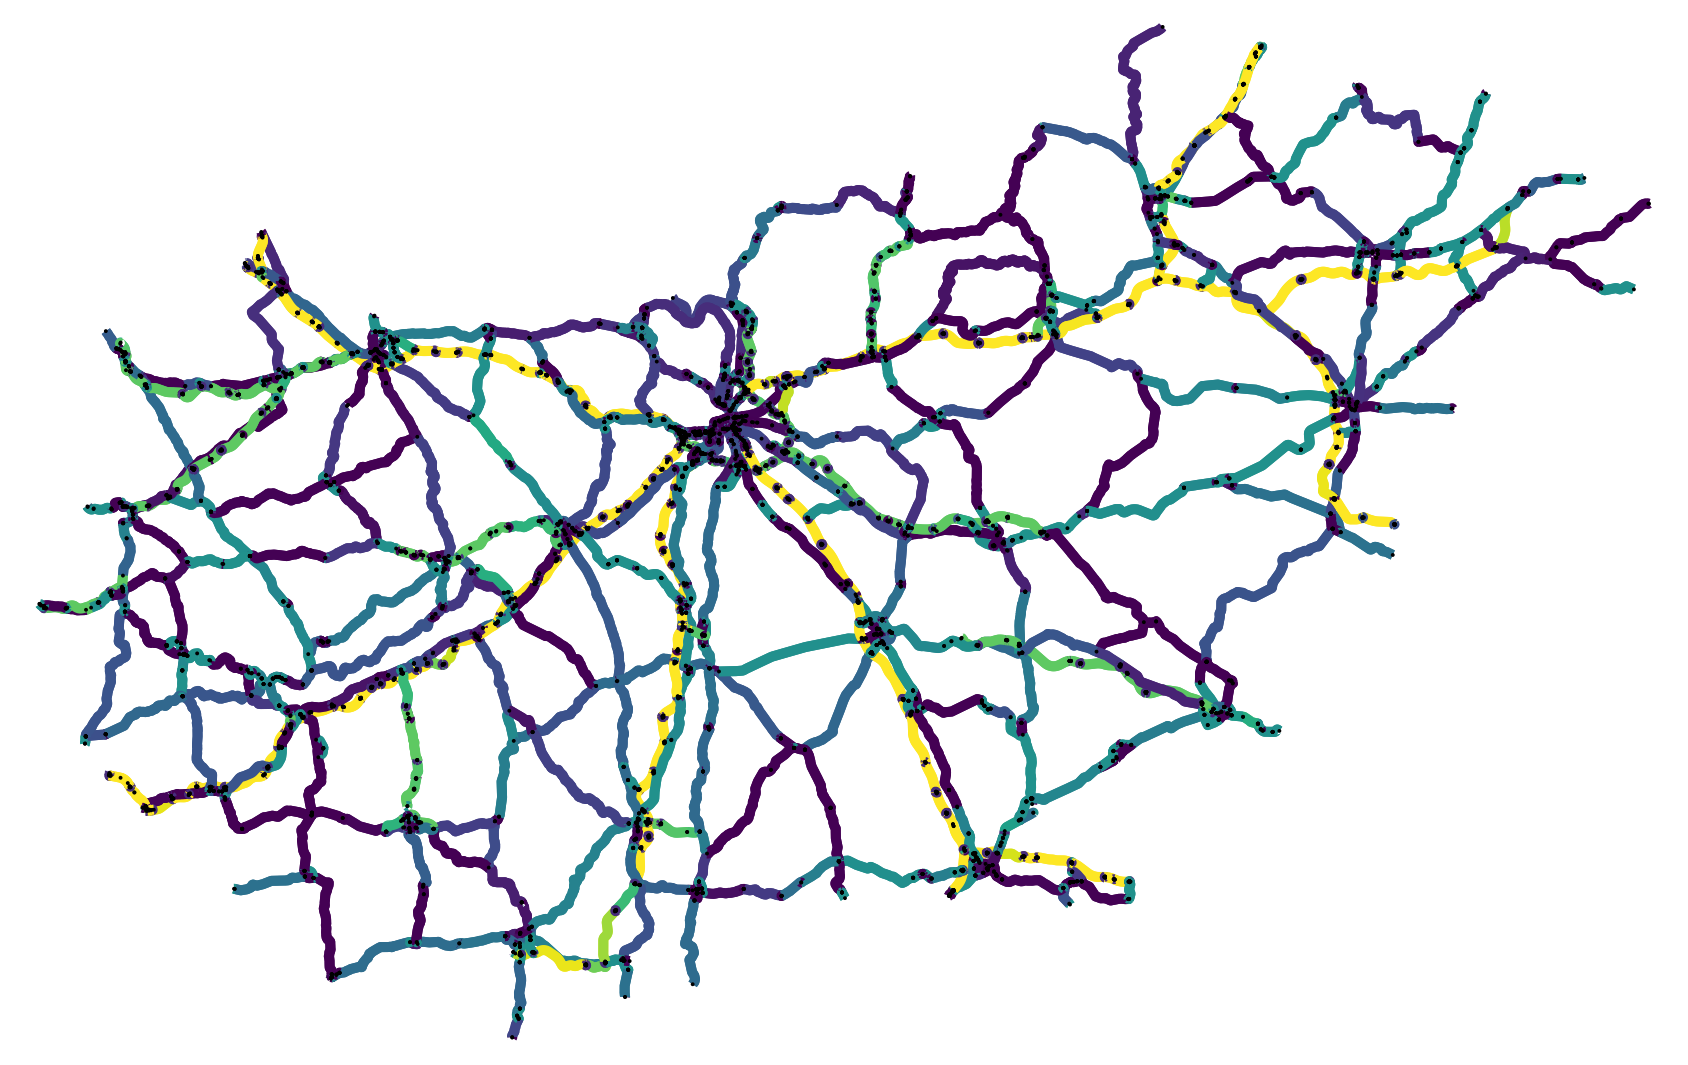

(<Figure size 2160x1440 with 1 Axes>, <AxesSubplot:>)

In [23]:
# where is the speed data missing?
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
fig,ax = plt.subplots(1,1,figsize=(30,20))
ox.plot_graph(Gs,node_color='k',edge_color=[edges_s.loc[(*e,0)]["speedcolor"] for e in Gs.edges()],ax=ax,edge_linewidth=10)
# cax = fig.add_axes([-0.1, 0.2, 0.02, 0.6])
# plt.colorbar(sm,cax=cax)
# for t in cax.get_yticklabels():
#      t.set_fontsize(40)

In [25]:
ox.io.save_graphml(ox.graph_from_gdfs(nodes_s, edges_s), filepath="data/hungary_main_roads.graphml")

In [26]:
import geopandas as gpd

In [29]:
!mkdir data

In [33]:
nodes_s.to_file("data/hungary_main_roads_nodes.shp")
edges_s[["length","maxspeed_new","geometry"]].to_file("data/hungary_main_roads_edges.shp")

/tmp/ipykernel_11727/17071440.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  nodes_s.to_file("data/hungary_main_roads_nodes.shp")
/tmp/ipykernel_11727/17071440.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  edges_s[["length","maxspeed_new","geometry"]].to_file("data/hungary_main_roads_edges.shp")
